In [31]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import seaborn as sns

In [126]:
df = pd.read_csv('../../data/hate_speech.csv',index_col=0)
df.head()

,id,follower_count,friends_count,retweet_count,favorite_count,text,word_length,label
0,13857342,20161,780,0,0,trying least targeting specific group cause tr...,10,0
1,13857342,20161,780,0,4,saw fly stats display time tweetstats hashtag ...,13,0
2,82522377,4,64,0,1,sauce capsicum stock packet jar quality cookin...,15,1
3,13857342,20161,780,1,30,think going play video game day super stressfu...,11,0
4,930620467,18807,263,0,0,fight systemic problem time offering real tip ...,11,0


In [123]:
df = df[~df.text.isnull()]

In [127]:
df.shape

(3533, 8)

In [125]:
def plot_nas(trainData: pd.DataFrame):
    if trainData.isnull().sum().sum() != 0:
        na_df = (trainData.isnull().sum() / len(trainData)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title('Missing data in Variables',fontsize=18)
        plt.xlabel('Missing Ratio %',fontsize=16)
        plt.ylabel('Variable',fontsize=16)
        plt.show()
    else:
        print('No NAs found')
plot_nas(df)

No NAs found


In [117]:
df_test = df.drop_duplicates('id')

In [118]:
import plotly.graph_objects as go

import numpy as np
x0 = df_test[df_test.loc[:,'label']==0]['follower_count']
x1 = df_test[df_test.loc[:,'label']==1]['follower_count']

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='percent',
    name='not hate speech', # name used in legend and hover labels
    # xbins=dict( # bins used for histogram
    #     start=-4.0,
    #     end=3.0,
    #     size=0.5
    # ),
    marker_color='#EB89B5',
    opacity=0.75
))

fig.add_trace(go.Histogram(
    x=x1,
    histnorm='percent',
    name='hate speech',
    # xbins=dict(
    #     start=-3.0,
    #     end=4,
    #     size=0.5
    # ),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title={
        'text': "The distribution of numbers of followers per label ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title_text='follower Numbers', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    xaxis_range=[0,20000]
)
fig.write_html("./file.html")
fig.show()

In [120]:
import plotly.graph_objects as go

import numpy as np
x0 = df_test[df_test.loc[:,'label']==0]['friends_count']
x1 = df_test[df_test.loc[:,'label']==1]['friends_count']

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='percent',
    name='not hate speech', # name used in legend and hover labels
    # xbins=dict( # bins used for histogram
    #     start=-4.0,
    #     end=3.0,
    #     size=0.5
    # ),
    marker_color='#EB89B5',
    opacity=0.75
))

fig.add_trace(go.Histogram(
    x=x1,
    histnorm='percent',
    name='hate speech',
    # xbins=dict(
    #     start=-3.0,
    #     end=4,
    #     size=0.5
    # ),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title={
        'text': "The distribution of numbers of friends per account",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title_text='Friends Count', # xaxis label
    yaxis_title_text='Percentage', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1, # gap between bars of the same location coordinates
    xaxis_range=[0,5000]
)
fig.show()

<AxesSubplot:>

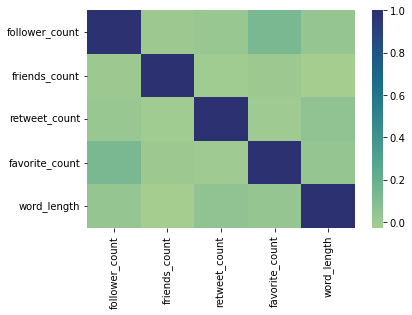

In [84]:
mx = df[['follower_count','friends_count','retweet_count','favorite_count','word_length']].corr()
sns.heatmap(mx,cmap='crest')

we can see that 1th percentile equales to 3th percentile of this dataset, which means that the data on the right side of the line in the plot are all outliers. This is the case for both the likes distribution and retweet distribution

In [92]:
df

,id,follower_count,friends_count,retweet_count,favorite_count,text,word_length,label
0,13857342,20161,780,0,0,trying least targeting specific group cause tr...,10,0
1,13857342,20161,780,0,4,saw fly stats display time tweetstats hashtag ...,13,0
2,82522377,4,64,0,1,sauce capsicum stock packet jar quality cookin...,15,1
3,13857342,20161,780,1,30,think going play video game day super stressfu...,11,0
4,930620467,18807,263,0,0,fight systemic problem time offering real tip ...,11,0
...,...,...,...,...,...,...,...,...
3528,14861476,415,830,0,1,bean toast dinner tonight would score higher t...,12,0
3529,2756873076,1796,1857,1,3,lost questionsformen wa essentially ford way e...,10,1
3530,13857342,19172,797,5,5,step post facebook step kia link step get dog ...,15,0
3531,2756873076,1796,1857,1,0,rt hear abhorrent display sexism good wife tragic,8,1


In [95]:
np.max(df[df['label']==1]['favorite_count'])

83

In [105]:
df.loc[(df.label==1) & (df.favorite_count==83)]

,id,follower_count,friends_count,retweet_count,favorite_count,text,word_length,label
1340,13857342,20161,780,24,83,excuse rave wa promised dead mouse,6,1


[Text(0, 0.5, 'count'),
 Text(0.5, 1.0, 'The distribution of favorite_count'),
 Text(0.5, 0, 'favorite_count(number)')]

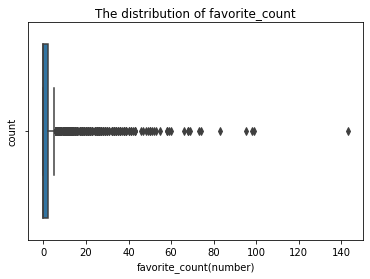

In [85]:
sns.boxplot(data=df,x = 'favorite_count').set(ylabel='count',title='The distribution of favorite_count',xlabel='favorite_count(number)')

In [13]:
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import sent_tokenize, word_tokenize
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# stopwords = stopwords.words('English')
# def pipeline(input:str):
#     str_input = re.sub(pattern=r'[^a-zA-z]',repl=' ',string=input)
# #     str_output = correct_sentence_spelling(sentence = str_input)
#     token_list = word_tokenize(str_input)
#     token_list = [lemmatizer.lemmatize(i) for i in token_list]
#     word_list = [word for word in token_list if word not in stopwords]
#     word_str = ' '.join(word_list)
#     return word_str
# df_t = df[~df.text.str.contains('RT')].copy()
# df_t.text = df_t.text.apply(pipeline)
# df_t.loc[:,'length'] = df_t.text.apply(lambda x:len(x))

[Text(0.5, 1.0, 'Text Length Contrast Between Labels'),
 Text(0, 0.5, 'Count (number)'),
 Text(0.5, 0, 'length (words)')]

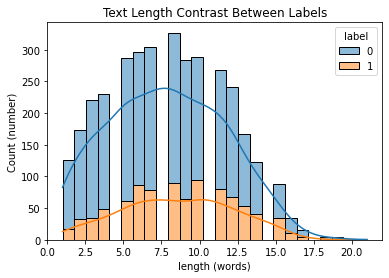

In [106]:
sns.histplot(data=df,x='word_length',kde=True,hue='label',multiple='stack').set(title='Text Length Contrast Between Labels',ylabel='Count (number)',xlabel='length (words)')

In [112]:
 df.text.apply(lambda x: x.replace('rt',''))

0       trying least targeting specific group cause tr...
1       saw fly stats display time tweetstats hashtag ...
2       sauce capsicum stock packet jar quality cookin...
3       think going play video game day super stressfu...
4       fight systemic problem time offering real tip ...
                              ...                        
3528    bean toast dinner tonight would score higher t...
3529    lost questionsformen wa essentially ford way e...
3530    step post facebook step kia link step get dog ...
3531       hear abhorrent display sexism good wife tragic
3532            would nice annie end sudden death kat mkr
Name: text, Length: 3485, dtype: object

In [114]:
df.text = df.text.apply(lambda x: x.replace('rt',''))

In [115]:
content = ','.join(df.loc[df.label==1]['text'].tolist())

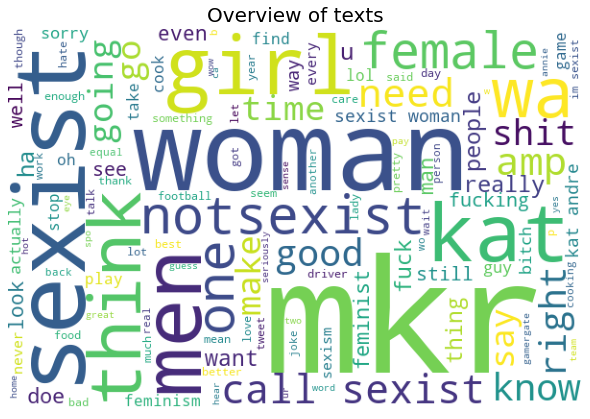

In [116]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 600, height = 400,
                background_color ='white',
                stopwords = stopwords,
                prefer_horizontal=0.5,
                min_font_size = 10).generate(content)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.title('Overview of texts',fontsize=20)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()